<a href="https://colab.research.google.com/github/solong96/solong96/blob/main/bert_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tomotopy
!pip install lemminflect

In [6]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import tomotopy as tp
from tqdm import tqdm
from nltk import pos_tag
from nltk.tokenize import word_tokenize
# nltk.download()
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
import spacy
import lemminflect
from lemminflect import getLemma
from operator import itemgetter
import sys
import os
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
stops = stopwords.words('english')
newstop = ['et', 'al', 'us','factor','evidence','review','analysis','impact','effect','example','research','paper','result',"first","second","third","forth",'doe', 'C', 'elsevier', 'ltd', 'etc', 'was', 'wa', 'ha', 'springer','mdpi','evaluation','evaluating']
stops.extend(newstop)
# path = '/Users/youngeun/Library/CloudStorage/OneDrive-충북대학교/05. 수업/08. AI 교육/ICT/digital_cc/0703'
path = '/content/drive/MyDrive'
os.chdir(path)

In [8]:
content = pd.read_excel('0703_deep_cc_crawling.xlsx')
content2 = content.drop_duplicates(['Abstract'],keep='first',ignore_index=True)
content3 = content2.drop_duplicates(['Article Title'],keep='first',ignore_index=True)
print(content3.duplicated(['Abstract','Article Title']).sum())
content = content3
content

0


,Publication Year,Article Title,Source Title,Abstract
0,2017,Impacts of climate change on agricultural wate...,ADVANCES IN CLIMATE CHANGE RESEARCH,Climate change is having a considerable impact...
1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...
2,2020,North American birds require mitigation and ad...,CONSERVATION SCIENCE AND PRACTICE,"In an emerging climate crisis, effective conse..."
3,2022,Sustainability in ophthalmology. Adaptation to...,OPHTHALMOLOGIE,The climate crisis is threatening the health o...
4,2017,Mitigating global warming: a real options appr...,ANNALS OF OPERATIONS RESEARCH,Mitigation and adaptation represent two soluti...
...,...,...,...,...
99528,2014,Microstructure of Nb-Bearing Pipeline Steel wi...,STEEL RESEARCH INTERNATIONAL,X70 pipe line steel with high mechanical stren...
99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...
99530,2013,The effect of morphology on the stability of r...,SCRIPTA MATERIALIA,Synchrotron X-ray diffraction and transmission...
99531,2023,Effect of Mixed Charging of Nut Coke and Sinte...,JOURNAL OF SUSTAINABLE METALLURGY,With the increasing demand for low-carbon meta...


In [74]:
class CustomTokenizer:
    def __call__(self, text):

        text = text.lower()

        pat = re.sub(r'[^A-Za-z0-9\\-]',' ', text)
        pat = re.sub(r' - ',' ',pat)
        pat = re.sub(r' -',' ',pat)
        pat = re.sub(r'- ',' ',pat)
        pat = pat.strip()
        pat = " ".join(pat.split())
        pat = re.sub(r'\b\sA\s\b',' ',pat); pat = re.sub(r'\b\sB\s\b',' ',pat); pat = re.sub(r'\b\sC\s\b',' ',pat); pat = re.sub(r'\b\sD\s\b',' ',pat); pat = re.sub(r'\b\sE\s\b',' ',pat); pat = re.sub(r'\b\sF\s\b',' ',pat); pat = re.sub(r'\b\sG\s\b',' ',pat); pat = re.sub(r'\b\sH\s\b',' ',pat); pat = re.sub(r'\b\sI\s\b',' ',pat); pat = re.sub(r'\b\sJ\s\b',' ',pat); pat = re.sub(r'\b\sK\s\b',' ',pat); pat = re.sub(r'\b\sL\s\b',' ',pat); pat = re.sub(r'\b\sM\s\b',' ',pat); pat = re.sub(r'\b\sN\s\b',' ',pat); pat = re.sub(r'\b\sO\s\b',' ',pat); pat = re.sub(r'\b\sP\s\b',' ',pat); pat = re.sub(r'\b\sQ\s\b',' ',pat); pat = re.sub(r'\b\sR\s\b',' ',pat); pat = re.sub(r'\b\sS\s\b',' ',pat); pat = re.sub(r'\b\sT\s\b',' ',pat); pat = re.sub(r'\b\sU\s\b',' ',pat); pat = re.sub(r'\b\sV\s\b',' ',pat); pat = re.sub(r'\b\sW\s\b',' ',pat); pat = re.sub(r'\b\sX\s\b',' ',pat); pat = re.sub(r'\b\sY\s\b',' ',pat); pat = re.sub(r'\b\sZ\s\b',' ',pat)
        pat = re.sub(r'\b\sa\s\b',' ',pat); pat = re.sub(r'\b\sb\s\b',' ',pat); pat = re.sub(r'\b\sc\s\b',' ',pat); pat = re.sub(r'\b\sd\s\b',' ',pat); pat = re.sub(r'\b\se\s\b',' ',pat); pat = re.sub(r'\b\sf\s\b',' ',pat); pat = re.sub(r'\b\sg\s\b',' ',pat); pat = re.sub(r'\b\sh\s\b',' ',pat); pat = re.sub(r'\b\si\s\b',' ',pat); pat = re.sub(r'\b\sj\s\b',' ',pat); pat = re.sub(r'\b\sk\s\b',' ',pat); pat = re.sub(r'\b\sl\s\b',' ',pat); pat = re.sub(r'\b\sm\s\b',' ',pat); pat = re.sub(r'\b\sn\s\b',' ',pat); pat = re.sub(r'\b\so\s\b',' ',pat); pat = re.sub(r'\b\sp\s\b',' ',pat); pat = re.sub(r'\b\sq\s\b',' ',pat); pat = re.sub(r'\b\sr\s\b',' ',pat); pat = re.sub(r'\b\ss\s\b',' ',pat); pat = re.sub(r'\b\st\s\b',' ',pat); pat = re.sub(r'\b\su\s\b',' ',pat); pat = re.sub(r'\b\sv\s\b',' ',pat); pat = re.sub(r'\b\sw\s\b',' ',pat); pat = re.sub(r'\b\sx\s\b',' ',pat); pat = re.sub(r'\b\sy\s\b',' ',pat); pat = re.sub(r'\b\sz\s\b',' ',pat)
        pat = re.sub(r'\b\s0\b\s',' ',pat); pat = re.sub(r'\b\s1\b\s',' ',pat); pat = re.sub(r'\b\s2\b\s',' ',pat); pat = re.sub(r'\b\s3\b\s',' ',pat); pat = re.sub(r'\b\s4\b\s',' ',pat); pat = re.sub(r'\b\s5\b\s',' ',pat); pat = re.sub(r'\b\s6\b\s',' ',pat); pat = re.sub(r'\b\s7\b\s',' ',pat); pat = re.sub(r'\b\s8\b\s',' ',pat); pat = re.sub(r'\b\s9\b\s',' ',pat)

        token = word_tokenize(pat)
        token = [w for w in token if not w in stops]
        token = [getLemma(w, upos='NOUN')[0] for w in token]
        tagged = pos_tag(token) # 첫번째 결과를 사용
        #print(tagged)
        pat2 = [w[0] for w in tagged if w[1] == 'NN' or  w[1] == 'NNP' or  w[1] == 'NNS' or  w[1] == 'NNPS' or  w[1] == 'JJ' or  w[1] == 'JJR' or  w[1] == 'JJS' or w[0].isupper() == True]
        pat2 = [getLemma(w, upos='NOUN')[0] for w in pat2]

        pat3 = []
        for w in pat2:
            if w[0:len(w)-1].isupper() == True:
                pat3.append(w)
            else:
                pat3.append(w.lower())
        pat4 = []
        for w in pat3:
            if not w in stops:
                pat4.append(w)

        # climate change 합치기
        pat5 = []
        for i in range(len(pat4)):
            if i == len(pat4)-1 and pat4[i] == 'climate':
                continue
            if pat4[i] == 'climate' and pat4[i+1] == 'change':
                pat5.append("-".join(itemgetter(i,i+1)(pat4)))
                continue
            pat5.append(pat4[i])
        pat6 = []
        for i in range(len(pat5)):
            if pat5[i-1] == 'climate-change' and pat5[i] == 'change':
                continue
            pat6.append(pat5[i])

        pat7 = []
        for i in range(len(pat6)):
            if i == len(pat6)-1 and pat6[i] == 'case':
                continue
            if pat6[i] == 'case' and pat6[i+1] == 'study':
                pat7.append("-".join(itemgetter(i,i+1)(pat6)))
                continue
            pat7.append(pat6[i])
        pat8 = []
        for i in range(len(pat7)):
            if pat7[i-1] == 'case-study' and pat7[i] == 'study':
                continue
            pat8.append(pat7[i])

        pat9 = []
        for i in range(len(pat8)):
            if i == len(pat8)-1 and pat8[i] == 'carbon':
                continue
            if pat8[i] == 'carbon' and pat8[i+1] == 'emission':
                pat9.append("-".join(itemgetter(i,i+1)(pat8)))
                continue
            pat9.append(pat8[i])
        pat10 = []
        for i in range(len(pat9)):
            if pat9[i-1] == 'carbon-emission' and pat9[i] == 'emission':
                continue
            pat10.append(pat9[i])

        pat11 = []
        for i in range(len(pat10)):
            if i == len(pat10)-1 and pat10[i] == 'carbon':
                continue
            if pat10[i] == 'carbon' and pat10[i+1] == 'reduction':
                pat11.append("-".join(itemgetter(i,i+1)(pat10)))
                continue
            pat11.append(pat10[i])
        pat12 = []
        for i in range(len(pat11)):
            if pat11[i-1] == 'carbon-reduction' and pat11[i] == 'reduction':
                continue
            pat12.append(pat11[i])

        pat13 = []
        for i in range(len(pat12)):
            if i == len(pat12)-1 and pat12[i] == 'carbon':
                continue
            if pat12[i] == 'carbon' and pat12[i+1] == 'neutral':
                pat13.append("-".join(itemgetter(i,i+1)(pat12)))
                continue
            pat13.append(pat12[i])
        pat14 = []
        for i in range(len(pat13)):
            if pat13[i-1] == 'carbon-neutral' and pat13[i] == 'neutral':
                continue
            pat14.append(pat13[i])

        pat15 = []
        for i in range(len(pat14)):
            if i == len(pat14)-1 and pat14[i] == 'carbon':
                continue
            if pat14[i] == 'carbon' and pat14[i+1] == 'neutrality':
                pat15.append("-".join(itemgetter(i,i+1)(pat14)))
                continue
            pat15.append(pat14[i])
        pat16 = []
        for i in range(len(pat15)):
            if pat15[i-1] == 'carbon-neutrality' and pat15[i] == 'neutrality':
                continue
            pat16.append(pat15[i])

        pat17 = []
        for i in range(len(pat16)):
            if i == len(pat16)-1 and pat16[i] == 'sustainable':
                continue
            if pat16[i] == 'sustainable' and pat16[i+1] == 'development':
                pat17.append("-".join(itemgetter(i,i+1)(pat16)))
                continue
            pat17.append(pat16[i])
        pat18 = []
        for i in range(len(pat17)):
            if pat17[i-1] == 'sustainable-development' and pat17[i] == 'development':
                continue
            pat18.append(pat17[i])


        for i in range(len(pat18)):
            if pat18[i] == 'CC':
                pat18[i] = 'climate-change'

        for i in range(len(pat18)):
            if pat18[i] == 'GHG':
                pat18[i] = 'greenhous-gas'

        for i in range(len(pat18)):
            if pat18[i] == 'CO':
                pat18[i] = 'CO2'

        pat18 = [w for w in pat18 if not len(w) == 1]

        return ' '.join(pat18)

In [75]:
custom_tokenizer = CustomTokenizer()
sentence = []
for i in tqdm(content['Source Title']):
    sentence.append(custom_tokenizer(i))

word = []
for line in tqdm(sentence):
    tokens = word_tokenize(line)
    word.append(tokens)

100%|██████████| 99533/99533 [00:10<00:00, 9425.66it/s] 


In [ ]:
for i in tqdm(range(0,20)):
    words = sum(word, [])

100%|██████████| 99533/99533 [00:06<00:00, 15339.87it/s]


In [ ]:
print(sentence[0:5])
print(content['Source Title'][0:5])
print(words[0:20])

['advance climate-change', 'global environmental politics', 'conservation science practice', 'ophthalmologie', 'annals operation']
0    ADVANCES IN CLIMATE CHANGE RESEARCH
1          GLOBAL ENVIRONMENTAL POLITICS
2      CONSERVATION SCIENCE AND PRACTICE
3                         OPHTHALMOLOGIE
4          ANNALS OF OPERATIONS RESEARCH
Name: Source Title, dtype: object
['advance', 'climate-change', 'global', 'environmental', 'politics', 'conservation', 'science', 'practice', 'ophthalmologie', 'annals', 'operation', 'zeitschrift', 'fur', 'gastroenterologie', 'energy', 'sustainability', 'sustainable', 'city', 'society', 'education']


In [ ]:
counts = collections.Counter(words)
tags = counts.most_common()
tags[1:40]

[('science', 11993),
 ('environmental', 11415),
 ('energy', 7362),
 ('international', 6018),
 ('sustainability', 5359),
 ('policy', 5175),
 ('management', 5108),
 ('environment', 4890),
 ('ecology', 4270),
 ('change', 4055),
 ('global', 3053),
 ('water', 2908),
 ('engineering', 2890),
 ('production', 2712),
 ('biology', 2410),
 ('cleaner', 2410),
 ('material', 2251),
 ('frontier', 2207),
 ('society', 2142),
 ('forest', 1999),
 ('economics', 1991),
 ('development', 1985),
 ('sustainable', 1927),
 ('technology', 1921),
 ('system', 1762),
 ('climate', 1755),
 ('resource', 1749),
 ('total', 1731),
 ('letter', 1716),
 ('marine', 1619),
 ('ecological', 1529),
 ('health', 1482),
 ('earth', 1421),
 ('nature', 1384),
 ('agricultural', 1342),
 ('climatic', 1307),
 ('conservation', 1271),
 ('risk', 1250),
 ('building', 1249)]

In [ ]:
tag_df=pd.DataFrame(tags, columns=["word","freq"])
pd.DataFrame(tag_df).to_csv('0703_most_word_cc_journal1.csv', index=False)

In [ ]:
num=0
uni_word = word.copy()
for i in uni_word :
    uni_word[num] = list(set(uni_word[num]))
    num+=1

print(word[1:4])
print(uni_word[1:4])

[['global', 'environmental', 'politics'], ['conservation', 'science', 'practice'], ['ophthalmologie']]
[['global', 'environmental', 'politics'], ['conservation', 'practice', 'science'], ['ophthalmologie']]


In [ ]:
count = {} #이 괄호는 dictionary
for j in tqdm(uni_word):
    for i, a in enumerate(j):
        for b in j[i+1:]:
            if a>b:
                count[b, a] = count.get((b, a),0) + 1
            else :
                count[a, b] = count.get((a, b),0) + 1

df=pd.DataFrame.from_dict(count, orient='index')

100%|██████████| 99533/99533 [00:00<00:00, 384668.30it/s]

                               0
(fur, zeitschrift)            17
(city, sustainable)          440
(city, society)              389
(society, sustainable)       388
(education, science)          69
(educativa, innovacion)        1
(economics, environmental)   370
(economics, policy)          267
(economics, journal)         368
(environmental, policy)     1870


In [ ]:
print(df[10:20])

list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

                               0
(fur, zeitschrift)            17
(city, sustainable)          440
(city, society)              389
(society, sustainable)       388
(education, science)          69
(educativa, innovacion)        1
(economics, environmental)   370
(economics, policy)          267
(economics, journal)         368
(environmental, policy)     1870


In [ ]:
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])
df2

,term1,term2,freq
0,advance,climate-change,75
1,environmental,global,771
2,global,politics,48
3,environmental,politics,152
4,conservation,practice,44
...,...,...,...
15326,de,patrimoine,1
15327,metalurgium,revistum,1
15328,finance,global,1
15329,ceramic,processing,1


In [ ]:
df3=df2.sort_values(by=['freq'],ascending=False)
df3.head(100)

,term1,term2,freq
30,international,journal,4891
20,environmental,journal,2962
285,environmental,science,2783
149,journal,production,2475
151,cleaner,journal,2375
...,...,...,...
480,science,united,463
479,national,united,463
481,academy,united,463
493,america,state,463


In [ ]:
pd.DataFrame(df3).to_csv('0703_freq_cc_journal.csv', index=False)

(AND) Title : energy OR electricity OR industry OR waste OR traffic OR transport OR vehicle OR built OR building OR Infra*  OR "land use" OR "green space" OR "green area" OR biodiversity OR water OR flood OR drought OR "heat wave" OR "heat island" OR "urban heat" OR city OR urban OR "urban space" OR "urban place"

완화 : 에너지, 산업, 폐기물, 교통, 건축물, 토지이용
적응 : 녹지, 생물다양성, 물, 열섬

In [ ]:
print(len(word))
print(len(content))

print(word[99532])
print(content['Source Title'][99532])

99533
99533
['journal', 'industrial', 'ecology']
JOURNAL OF INDUSTRIAL ECOLOGY


In [76]:
mostword = pd.read_csv('0703_most_word_cc_journal.csv')
mostword[0:10]

,word,category,toxic
0,law,governance,3
1,governance,governance,3
2,c-government,governance,3
3,energy,energy,11
4,renewable,energy,11
5,bioenergy,energy,11
6,fuel,energy,11
7,power,energy,11
8,hydrogen,energy,11
9,biomass,energy,11


In [78]:
len(mostword['toxic'].unique())

12

In [79]:
content['category'] = 0
content['toxic'] = 0
content

,Publication Year,Article Title,Source Title,Abstract,category,toxic
0,2017,Impacts of climate change on agricultural wate...,ADVANCES IN CLIMATE CHANGE RESEARCH,Climate change is having a considerable impact...,0,0
1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...,0,0
2,2020,North American birds require mitigation and ad...,CONSERVATION SCIENCE AND PRACTICE,"In an emerging climate crisis, effective conse...",0,0
3,2022,Sustainability in ophthalmology. Adaptation to...,OPHTHALMOLOGIE,The climate crisis is threatening the health o...,0,0
4,2017,Mitigating global warming: a real options appr...,ANNALS OF OPERATIONS RESEARCH,Mitigation and adaptation represent two soluti...,0,0
...,...,...,...,...,...,...
99528,2014,Microstructure of Nb-Bearing Pipeline Steel wi...,STEEL RESEARCH INTERNATIONAL,X70 pipe line steel with high mechanical stren...,0,0
99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...,0,0
99530,2013,The effect of morphology on the stability of r...,SCRIPTA MATERIALIA,Synchrotron X-ray diffraction and transmission...,0,0
99531,2023,Effect of Mixed Charging of Nut Coke and Sinte...,JOURNAL OF SUSTAINABLE METALLURGY,With the increasing demand for low-carbon meta...,0,0


In [80]:
for i in tqdm(range(len(word))):
    for j in range(len(mostword['word'])):
        if mostword['word'][j] in word[i]:
            content['category'][i] = mostword['category'][j]
            content['toxic'][i] = mostword['toxic'][j]

100%|██████████| 99533/99533 [01:23<00:00, 1198.04it/s]


In [81]:
content

,Publication Year,Article Title,Source Title,Abstract,category,toxic
0,2017,Impacts of climate change on agricultural wate...,ADVANCES IN CLIMATE CHANGE RESEARCH,Climate change is having a considerable impact...,0,0
1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...,policy,31
2,2020,North American birds require mitigation and ad...,CONSERVATION SCIENCE AND PRACTICE,"In an emerging climate crisis, effective conse...",0,0
3,2022,Sustainability in ophthalmology. Adaptation to...,OPHTHALMOLOGIE,The climate crisis is threatening the health o...,0,0
4,2017,Mitigating global warming: a real options appr...,ANNALS OF OPERATIONS RESEARCH,Mitigation and adaptation represent two soluti...,0,0
...,...,...,...,...,...,...
99528,2014,Microstructure of Nb-Bearing Pipeline Steel wi...,STEEL RESEARCH INTERNATIONAL,X70 pipe line steel with high mechanical stren...,0,0
99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...,policy,31
99530,2013,The effect of morphology on the stability of r...,SCRIPTA MATERIALIA,Synchrotron X-ray diffraction and transmission...,0,0
99531,2023,Effect of Mixed Charging of Nut Coke and Sinte...,JOURNAL OF SUSTAINABLE METALLURGY,With the increasing demand for low-carbon meta...,0,0


In [84]:
# pd.DataFrame(content).to_excel('0703_deep_cc_crawling_toxic.xlsx',header=['Publication Year','Article Title','Source Title','Abstract','category','toxic'])

In [9]:
content = pd.read_excel('0703_deep_cc_crawling_toxic.xlsx')

In [10]:
content

,Unnamed: 0,Publication Year,Article Title,Source Title,Abstract,category,toxic
0,0,2017,Impacts of climate change on agricultural wate...,ADVANCES IN CLIMATE CHANGE RESEARCH,Climate change is having a considerable impact...,0,0
1,1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...,policy,31
2,2,2020,North American birds require mitigation and ad...,CONSERVATION SCIENCE AND PRACTICE,"In an emerging climate crisis, effective conse...",0,0
3,3,2022,Sustainability in ophthalmology. Adaptation to...,OPHTHALMOLOGIE,The climate crisis is threatening the health o...,0,0
4,4,2017,Mitigating global warming: a real options appr...,ANNALS OF OPERATIONS RESEARCH,Mitigation and adaptation represent two soluti...,0,0
...,...,...,...,...,...,...,...
99528,99528,2014,Microstructure of Nb-Bearing Pipeline Steel wi...,STEEL RESEARCH INTERNATIONAL,X70 pipe line steel with high mechanical stren...,0,0
99529,99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...,policy,31
99530,99530,2013,The effect of morphology on the stability of r...,SCRIPTA MATERIALIA,Synchrotron X-ray diffraction and transmission...,0,0
99531,99531,2023,Effect of Mixed Charging of Nut Coke and Sinte...,JOURNAL OF SUSTAINABLE METALLURGY,With the increasing demand for low-carbon meta...,0,0


In [11]:
train_dataset = content[content['category'] != 0]
test_dataset = content[content['category'] == 0]

train_dataset

,Unnamed: 0,Publication Year,Article Title,Source Title,Abstract,category,toxic
1,1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...,policy,31
6,6,2019,Aligning Urban Policy with Climate Action in t...,ENERGIES,Climate change is the biggest global threat of...,energy,11
11,11,2022,Waiting for Godot? The case for climate change...,JOURNAL OF ENVIRONMENTAL ECONOMICS AND POLICY,Global warming is the most significant threat ...,policy,31
14,14,2021,Climate Change and Companion Animals: Identify...,INTEGRATIVE AND COMPARATIVE BIOLOGY,Synopsis Recent natural disasters and weather ...,biodiversity,22
27,27,2022,Vermont Global Warming Solutions Act: The Cost...,LAWS,The Vermont (VT) Global Warming Solutions Act ...,governance,3
...,...,...,...,...,...,...,...
99507,99507,2018,Electric vehicle tour planning,TRANSPORTATION RESEARCH PART D-TRANSPORT AND E...,This study extends the orienteering problem wi...,traffic,14
99515,99515,2019,Current status of wind energy policy in Poland,RENEWABLE ENERGY,The European Union's energy strategy and envir...,energy,11
99521,99521,2019,Synthesis and investigations of heterocyclic c...,INTERNATIONAL JOURNAL OF INDUSTRIAL CHEMISTRY,The corrosion inhibition of mild steel in 0.5 ...,industry,12
99529,99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...,policy,31


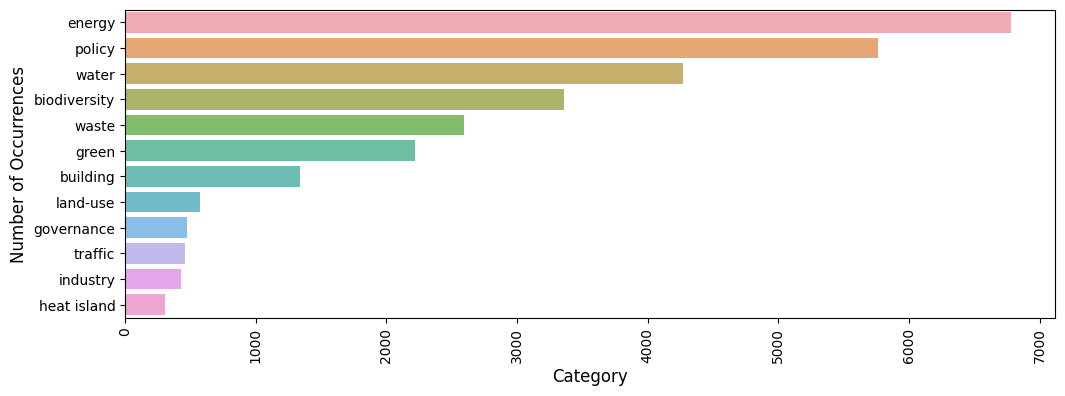

In [12]:
cnt = train_dataset['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x = cnt.values, y = cnt.index, alpha = 0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [13]:
train_dataset = train_dataset[['Abstract', 'toxic']]
train_dataset

,Abstract,toxic
1,Multiple visions for how urbanism can respond ...,31
6,Climate change is the biggest global threat of...,11
11,Global warming is the most significant threat ...,31
14,Synopsis Recent natural disasters and weather ...,22
27,The Vermont (VT) Global Warming Solutions Act ...,3
...,...,...
99507,This study extends the orienteering problem wi...,14
99515,The European Union's energy strategy and envir...,11
99521,The corrosion inhibition of mild steel in 0.5 ...,12
99529,Decarbonizing electricity production in the EU...,31


In [14]:
print(train_dataset['toxic'].unique())
print(len(train_dataset['toxic'].unique()))

[31 11 22  3 15 21 16 13 14 23 12 24]
12


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.rnn import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout, Embedding
from keras.layers.normalization import batch_normalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import os

In [17]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.87.208.66:8470


REPLICAS:  8


[data split]

train, validataion, test 로 쪼개기

In [27]:
train_dataset

,Abstract,toxic
1,Multiple visions for how urbanism can respond ...,31
6,Climate change is the biggest global threat of...,11
11,Global warming is the most significant threat ...,31
14,Synopsis Recent natural disasters and weather ...,22
27,The Vermont (VT) Global Warming Solutions Act ...,3
...,...,...
99507,This study extends the orienteering problem wi...,14
99515,The European Union's energy strategy and envir...,11
99521,The corrosion inhibition of mild steel in 0.5 ...,12
99529,Decarbonizing electricity production in the EU...,31


In [28]:
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(df_input, stratify_colname='toxic',
                                         frac_train=0.8, frac_val=0.1, frac_test=0.1,
                                         random_state=None):

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

In [89]:
train, validation, test = split_stratified_into_train_val_test(train_dataset)

In [90]:
print(f"Training Data Size : {len(train)} ({len(train)/len(train+validation+test)*100:^.2f} %)")
print(f"Validation Data Size : {len(validation)} ({len(validation)/len(train+validation+test)*100:^.2f} %)")
print(f"Testing Data Size : {len(test)} ({len(validation)/len(train+validation+test)*100:^.2f} %)")

Training Data Size : 22849 (80.00 %)
Validation Data Size : 2856 (10.00 %)
Testing Data Size : 2857 (10.00 %)


In [91]:
train

,Abstract,toxic
39023,"Pacific Island countries face food insecurity,...",31
64119,The well-known benchmark process for hydrodeal...,11
50276,Tree rings include retrospective information a...,21
80226,Strategies to reduce carbon emissions are set ...,31
20960,The Life Cycle Assessment (LCA) of a Geopolyme...,15
...,...,...
74882,Underwater photogrammetry provides a means of ...,23
1892,The climate crisis and related events are ofte...,31
53967,"Climate change, specifically the increasing fr...",21
92874,"Geological sequestration of acid gases, includ...",11


In [34]:
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''

    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [92]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train.Abstract.values, train.toxic.values,
                                                  stratify=train.toxic.values,
                                                  random_state=42,
                                                  test_size=0.2, shuffle=True)

In [36]:
class CustomTokenizer2:
    def __call__(self, text):

        if text.istitle() == True:
            text = text.capitalize()
        elif text.isupper() == True:
            text = text.capitalize()
        elif text.islower() == True:
            text = text.capitalize()
        else:
            text

        pat = re.sub(r'[^A-Za-z0-9\\-]',' ', text)
        pat = re.sub(r' - ',' ',pat)
        pat = re.sub(r' -',' ',pat)
        pat = re.sub(r'- ',' ',pat)
        pat = pat.strip()
        pat = " ".join(pat.split())
        pat = re.sub(r'\b\sA\s\b',' ',pat); pat = re.sub(r'\b\sB\s\b',' ',pat); pat = re.sub(r'\b\sC\s\b',' ',pat); pat = re.sub(r'\b\sD\s\b',' ',pat); pat = re.sub(r'\b\sE\s\b',' ',pat); pat = re.sub(r'\b\sF\s\b',' ',pat); pat = re.sub(r'\b\sG\s\b',' ',pat); pat = re.sub(r'\b\sH\s\b',' ',pat); pat = re.sub(r'\b\sI\s\b',' ',pat); pat = re.sub(r'\b\sJ\s\b',' ',pat); pat = re.sub(r'\b\sK\s\b',' ',pat); pat = re.sub(r'\b\sL\s\b',' ',pat); pat = re.sub(r'\b\sM\s\b',' ',pat); pat = re.sub(r'\b\sN\s\b',' ',pat); pat = re.sub(r'\b\sO\s\b',' ',pat); pat = re.sub(r'\b\sP\s\b',' ',pat); pat = re.sub(r'\b\sQ\s\b',' ',pat); pat = re.sub(r'\b\sR\s\b',' ',pat); pat = re.sub(r'\b\sS\s\b',' ',pat); pat = re.sub(r'\b\sT\s\b',' ',pat); pat = re.sub(r'\b\sU\s\b',' ',pat); pat = re.sub(r'\b\sV\s\b',' ',pat); pat = re.sub(r'\b\sW\s\b',' ',pat); pat = re.sub(r'\b\sX\s\b',' ',pat); pat = re.sub(r'\b\sY\s\b',' ',pat); pat = re.sub(r'\b\sZ\s\b',' ',pat)
        pat = re.sub(r'\b\sa\s\b',' ',pat); pat = re.sub(r'\b\sb\s\b',' ',pat); pat = re.sub(r'\b\sc\s\b',' ',pat); pat = re.sub(r'\b\sd\s\b',' ',pat); pat = re.sub(r'\b\se\s\b',' ',pat); pat = re.sub(r'\b\sf\s\b',' ',pat); pat = re.sub(r'\b\sg\s\b',' ',pat); pat = re.sub(r'\b\sh\s\b',' ',pat); pat = re.sub(r'\b\si\s\b',' ',pat); pat = re.sub(r'\b\sj\s\b',' ',pat); pat = re.sub(r'\b\sk\s\b',' ',pat); pat = re.sub(r'\b\sl\s\b',' ',pat); pat = re.sub(r'\b\sm\s\b',' ',pat); pat = re.sub(r'\b\sn\s\b',' ',pat); pat = re.sub(r'\b\so\s\b',' ',pat); pat = re.sub(r'\b\sp\s\b',' ',pat); pat = re.sub(r'\b\sq\s\b',' ',pat); pat = re.sub(r'\b\sr\s\b',' ',pat); pat = re.sub(r'\b\ss\s\b',' ',pat); pat = re.sub(r'\b\st\s\b',' ',pat); pat = re.sub(r'\b\su\s\b',' ',pat); pat = re.sub(r'\b\sv\s\b',' ',pat); pat = re.sub(r'\b\sw\s\b',' ',pat); pat = re.sub(r'\b\sx\s\b',' ',pat); pat = re.sub(r'\b\sy\s\b',' ',pat); pat = re.sub(r'\b\sz\s\b',' ',pat)
        pat = re.sub(r'\b\s0\b\s',' ',pat); pat = re.sub(r'\b\s1\b\s',' ',pat); pat = re.sub(r'\b\s2\b\s',' ',pat); pat = re.sub(r'\b\s3\b\s',' ',pat); pat = re.sub(r'\b\s4\b\s',' ',pat); pat = re.sub(r'\b\s5\b\s',' ',pat); pat = re.sub(r'\b\s6\b\s',' ',pat); pat = re.sub(r'\b\s7\b\s',' ',pat); pat = re.sub(r'\b\s8\b\s',' ',pat); pat = re.sub(r'\b\s9\b\s',' ',pat)

        token = word_tokenize(pat)
        token = [w for w in token if not w in stops]
        token = [getLemma(w, upos='NOUN')[0] for w in token]
        tagged = pos_tag(token) # 첫번째 결과를 사용
        #print(tagged)
        pat2 = [w[0] for w in tagged if w[1] == 'NN' or  w[1] == 'NNP' or  w[1] == 'NNS' or  w[1] == 'NNPS' or  w[1] == 'JJ' or  w[1] == 'JJR' or  w[1] == 'JJS' or w[0].isupper() == True]
        pat2 = [getLemma(w, upos='NOUN')[0] for w in pat2]

        pat3 = []
        for w in pat2:
            if w[0:len(w)-1].isupper() == True:
                pat3.append(w)
            else:
                pat3.append(w.lower())
        pat4 = []
        for w in pat3:
            if not w in stops:
                pat4.append(w)

        # climate change 합치기
        pat5 = []
        for i in range(len(pat4)):
            if i == len(pat4)-1 and pat4[i] == 'climate':
                continue
            if pat4[i] == 'climate' and pat4[i+1] == 'change':
                pat5.append("-".join(itemgetter(i,i+1)(pat4)))
                continue
            pat5.append(pat4[i])
        pat6 = []
        for i in range(len(pat5)):
            if pat5[i-1] == 'climate-change' and pat5[i] == 'change':
                continue
            pat6.append(pat5[i])

        pat7 = []
        for i in range(len(pat6)):
            if i == len(pat6)-1 and pat6[i] == 'case':
                continue
            if pat6[i] == 'case' and pat6[i+1] == 'study':
                pat7.append("-".join(itemgetter(i,i+1)(pat6)))
                continue
            pat7.append(pat6[i])
        pat8 = []
        for i in range(len(pat7)):
            if pat7[i-1] == 'case-study' and pat7[i] == 'study':
                continue
            pat8.append(pat7[i])

        pat9 = []
        for i in range(len(pat8)):
            if i == len(pat8)-1 and pat8[i] == 'carbon':
                continue
            if pat8[i] == 'carbon' and pat8[i+1] == 'emission':
                pat9.append("-".join(itemgetter(i,i+1)(pat8)))
                continue
            pat9.append(pat8[i])
        pat10 = []
        for i in range(len(pat9)):
            if pat9[i-1] == 'carbon-emission' and pat9[i] == 'emission':
                continue
            pat10.append(pat9[i])

        pat11 = []
        for i in range(len(pat10)):
            if i == len(pat10)-1 and pat10[i] == 'carbon':
                continue
            if pat10[i] == 'carbon' and pat10[i+1] == 'reduction':
                pat11.append("-".join(itemgetter(i,i+1)(pat10)))
                continue
            pat11.append(pat10[i])
        pat12 = []
        for i in range(len(pat11)):
            if pat11[i-1] == 'carbon-reduction' and pat11[i] == 'reduction':
                continue
            pat12.append(pat11[i])

        pat13 = []
        for i in range(len(pat12)):
            if i == len(pat12)-1 and pat12[i] == 'carbon':
                continue
            if pat12[i] == 'carbon' and pat12[i+1] == 'neutral':
                pat13.append("-".join(itemgetter(i,i+1)(pat12)))
                continue
            pat13.append(pat12[i])
        pat14 = []
        for i in range(len(pat13)):
            if pat13[i-1] == 'carbon-neutral' and pat13[i] == 'neutral':
                continue
            pat14.append(pat13[i])

        pat15 = []
        for i in range(len(pat14)):
            if i == len(pat14)-1 and pat14[i] == 'carbon':
                continue
            if pat14[i] == 'carbon' and pat14[i+1] == 'neutrality':
                pat15.append("-".join(itemgetter(i,i+1)(pat14)))
                continue
            pat15.append(pat14[i])
        pat16 = []
        for i in range(len(pat15)):
            if pat15[i-1] == 'carbon-neutrality' and pat15[i] == 'neutrality':
                continue
            pat16.append(pat15[i])

        pat17 = []
        for i in range(len(pat16)):
            if i == len(pat16)-1 and pat16[i] == 'sustainable':
                continue
            if pat16[i] == 'sustainable' and pat16[i+1] == 'development':
                pat17.append("-".join(itemgetter(i,i+1)(pat16)))
                continue
            pat17.append(pat16[i])
        pat18 = []
        for i in range(len(pat17)):
            if pat17[i-1] == 'sustainable-development' and pat17[i] == 'development':
                continue
            pat18.append(pat17[i])


        for i in range(len(pat18)):
            if pat18[i] == 'CC':
                pat18[i] = 'climate-change'

        for i in range(len(pat18)):
            if pat18[i] == 'GHG':
                pat18[i] = 'greenhous-gas'

        for i in range(len(pat18)):
            if pat18[i] == 'CO':
                pat18[i] = 'CO2'

        pat18 = [w for w in pat18 if not len(w) == 1]

        return ' '.join(pat18)

In [93]:
xtrain

array(["China's forests have functioned as important carbon sinks. They are expected to have substantial future potential for biomass carbon sequestration (BCS) resulting from afforestation and reforestation. However, previous estimates of forest BCS have included large uncertainties due to the limitations of sample size, multiple data sources, and inconsistent methodologies. This study refined the BCS estimation of China's forests from 2010 to 2050 using the national forest inventory data (FID) of 2009-2013, as well as the relationships between forest biomass and stand age retrieved from field observations for major forest types in different regions of China. The results showed that biomass-age relationships were well-fitted using field data, with respective R-2 values more than 0.70 (p < 0.01) for most forest types, indicating the applicability of these relationships developed for BCS estimation in China. National BCS would increase from 130.90 to 159.94 Tg C year(-1) during the peri

In [94]:
custom_tokenizer2 = CustomTokenizer2()
for i in tqdm(range(len(xtrain))):
    xtrain[i] = custom_tokenizer2(xtrain[i])

100%|██████████| 18279/18279 [18:26<00:00, 16.51it/s]


In [95]:
xtrain

array(['china forest important carbon sink substantial future potential biomass carbon sequestration BC afforestation reforestation previous estimate forest BC large uncertainty due limitation sample size multiple data source inconsistent methodology study BC estimation china forest national forest inventory data FID well relationship forest biomass stand age field observation major forest type different region china biomass-age relationship well-fitted field data R-2 value forest type applicability relationship BC estimation china national BC Tg year period 2010-2050 increase forest area biomass carbon density Tg year BC young middle-aged forest year increase premature mature overmature forest study period forest BC northern region largest contributor increment region southwest northeast northwest east region BC area expansion forest growth young middle-aged forest afforestation reforestation northern region BC reduction inner mongolium province Tg year cause slowdown increase forest 

In [96]:
xvalid

array(['Improving the efficiency of the forestry sector will have an important impact on our possibility to attain long-term sustainability and mitigate climate change. In this study, attainable, and sustainable, efficiency improvements in the harvesting of forest products are analyzed using Data Envelopment Analysis (DEA). The price impacts of the efficient harvesting volumes are evaluated in a second step using a spatial forest sector model. The results indicate that the harvested volumes of forest products, both for the industry and energy sectors, can be significantly increased if a more efficient forest management is adopted. This supply-side effect will also result in general price decreases for sawlogs, pulpwood, fuelwood and harvesting residues. However, in certain counties, and for specific forest products, the estimated decreasing price effect from a more efficient forest management cannot fully offset the increasing price effect of the energy sector expanding its use of fore

In [97]:
custom_tokenizer2 = CustomTokenizer2()
for i in tqdm(range(len(xvalid))):
    xvalid[i] = custom_tokenizer2(xvalid[i])

100%|██████████| 4570/4570 [04:33<00:00, 16.74it/s]


In [98]:
xvalid

array(['efficiency forestry sector important possibility long-term sustainability mitigate climate-change study attainable sustainable efficiency improvement forest product analyze data envelopment DEA price efficient harvesting volume evaluate step spatial forest sector volume forest product industry energy sector efficient forest management supply-side general price decrease sawlog pulpwood fuelwood residue certain county specific forest product estimate decreasing price efficient forest management price energy sector use forest product forest biomass enter market transition bioeconomy availability forest biomass restrict price investment bioeconomy profitable',
       'background severe global climate-change development low carbon economy consensus decision maker level energy-saving emission-reduction key global program governance important method practice china scientific development low carbon urban construction demand resident high energy consumption urbanization introduce proble

In [100]:
print(len(xtrain[np.argmax(xtrain)]))
max_len = (round(len(xtrain[np.argmax(xtrain)])/100)*100)+50
print(max_len)

801
850


In [101]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
# max_len = 1000

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#zero pad the sequences
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

In [102]:
# Calculating the Vocabulary Size and the number of Answers

print("Vocabulary size={}".format(len(token.word_index)))
print("Number of Answers={}".format(token.document_count))

Vocabulary size=47564
Number of Answers=22849


In [103]:
le = LabelEncoder()
num_classes=12 # 1 = Society & Culture 2 = Science & Mathematics 3 = Health 4 = Education & Reference 5 = Computers & Internet 6 = Sports 7 = Business & Finance 8 = Entertainment & Music 9 = Family & Relationships 10 = Politics & Government

ytrain = le.fit_transform(ytrain)
yvalid = le.transform(yvalid)

ytrain = to_categorical(ytrain)
yvalid = to_categorical(yvalid)

In [104]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
ytrain.shape

(18279, 12)

# Word Embeddings

While building our simple RNN models we talked about using word-embeddings , So what is word-embeddings and how do we get word-embeddings?
Here is the answer :
* https://www.coursera.org/learn/nlp-sequence-models/lecture/6Oq70/word-representation
* https://machinelearningmastery.com/what-are-word-embeddings/
<br> <br>
The latest approach to getting word Embeddings is using pretained GLoVe or using Fasttext. Without going into too much details, I would explain how to create sentence vectors and how can we use them to create a machine learning model on top of it and since I am a fan of GloVe vectors, word2vec and fasttext. In this Notebook, I'll be using the GloVe vectors. You can download the GloVe vectors from here http://www-nlp.stanford.edu/data/glove.840B.300d.zip or you can search for GloVe in datasets on Kaggle and add the file

In [62]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('glove.6B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400001it [01:14, 5403.80it/s]

Found 400001 word vectors.


# LSTM's

## Basic Overview

Simple RNN's were certainly better than classical ML algorithms and gave state of the art results, but it failed to capture long term dependencies that is present in sentences . So in 1998-99 LSTM's were introduced to counter to these drawbacks.

## In Depth Understanding

Why LSTM's?
* https://www.coursera.org/learn/nlp-sequence-models/lecture/PKMRR/vanishing-gradients-with-rnns
* https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/

What are LSTM's?
* https://www.coursera.org/learn/nlp-sequence-models/lecture/KXoay/long-short-term-memory-lstm
* https://distill.pub/2019/memorization-in-rnns/
* https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

# Code Implementation

We have already tokenized and paded our text for input to LSTM's

In [106]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300)) # 300은 차원 수
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 47564/47564 [00:00<00:00, 85746.31it/s]


LSTM(n, input_dim = k, input_length = k)

n : 메모리 셀의 개수(기억용량, 출력형태를 결정함)

In [133]:
# %%time
with strategy.scope():

    # A simple LSTM with glove embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))

    model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(64, activation='relu'))
    # model.add(Dense(16, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 850, 300)          14269500  
                                                                 
 lstm_12 (LSTM)              (None, 256)               570368    
                                                                 
 dense_29 (Dense)            (None, 64)                16448     
                                                                 
 dense_30 (Dense)            (None, 12)                780       
                                                                 
Total params: 14,857,096
Trainable params: 587,596
Non-trainable params: 14,269,500
_________________________________________________________________


In [134]:
model.fit(xtrain_pad, ytrain, epochs=50, batch_size=64*strategy.num_replicas_in_sync)

Epoch 1/50
36/36 [==============================] - 25s 393ms/step - loss: 1.7095 - accuracy: 0.4464 - val_loss: 1.4224 - val_accuracy: 0.5455
Epoch 2/50
36/36 [==============================] - 8s 210ms/step - loss: 1.3134 - accuracy: 0.5818 - val_loss: 1.2427 - val_accuracy: 0.6050
Epoch 3/50
36/36 [==============================] - 7s 206ms/step - loss: 1.1795 - accuracy: 0.6112 - val_loss: 1.1790 - val_accuracy: 0.6217
Epoch 4/50
36/36 [==============================] - 8s 210ms/step - loss: 1.1028 - accuracy: 0.6284 - val_loss: 1.1539 - val_accuracy: 0.6223
Epoch 5/50
36/36 [==============================] - 7s 205ms/step - loss: 1.0490 - accuracy: 0.6454 - val_loss: 1.0906 - val_accuracy: 0.6317
Epoch 6/50
36/36 [==============================] - 8s 210ms/step - loss: 1.0226 - accuracy: 0.6526 - val_loss: 1.0842 - val_accuracy: 0.6344
Epoch 7/50
36/36 [==============================] - 7s 203ms/step - loss: 0.9650 - accuracy: 0.6690 - val_loss: 1.0342 - val_accuracy: 0.6608
Epoch

In [135]:
yvalid_test = model.evaluate(xvalid_pad, yvalid, batch_size=64*strategy.num_replicas_in_sync)
print("Accuracy: %.2f%%" % (yvalid_test[1]*100))

9/9 [==============================] - 1s 61ms/step - loss: 2.2168 - accuracy: 0.6260
Accuracy: 62.60%


In [136]:
import pickle
pickle.dump(model, open('15_LSTM_04.pkl', 'wb'))
model.save('15_LSTM_04.h5', save_format='h5')
model.save('15_LSTM_04.keras')

In [137]:
yvalid_model = model.predict(xvalid_pad)
yvalid_model

143/143 [==============================] - 8s 44ms/step


array([[2.4261454e-10, 1.4282566e-02, 5.3953114e-10, ..., 6.5333537e-11,
        3.3560960e-10, 2.8953569e-05],
       [2.6665750e-06, 8.8746721e-01, 3.7808827e-06, ..., 5.4805791e-06,
        2.8692406e-05, 5.9766460e-02],
       [5.0865611e-07, 7.3450849e-07, 2.5228127e-08, ..., 9.9954814e-01,
        2.3931076e-07, 3.2032240e-05],
       ...,
       [4.9075268e-08, 9.5486857e-06, 2.7798416e-07, ..., 9.9987042e-01,
        3.3167094e-06, 6.7468653e-07],
       [1.0629085e-06, 1.8486310e-03, 7.5763761e-05, ..., 3.7012294e-01,
        1.9436053e-05, 7.2768726e-06],
       [5.5780736e-10, 1.6865686e-05, 7.4610675e-08, ..., 1.0284715e-06,
        3.3175979e-02, 1.4207803e-08]], dtype=float32)

In [138]:
print(xvalid[121])
print(np.where(yvalid_model[121] == np.max(yvalid_model[121])))
print(np.where(yvalid[121] == np.max(yvalid[121])))

climate bioenergy quantify term CO2 equivalent 100-year global potential equivalency metric method inability address emission timing focus single metric incomplete quantification climate bioenergy production study dynamic relative climate DRCUS curve novel approach visualize climate bioenergy system time DRCUS approach offer flexibility analyze system performance different value judgment category emission radiative forcing temperature change equivalency metric analytical time DRCUS curve fourteen bioenergy system value judgment merit order bioenergy system alter importance one-time land use change emission versus sustain carbon debt foregone sequestration emission flux short versus long-live climate forcer best practice bioenergy production irrespective value judgment high feedstock yield high conversion efficiency application carbon capture storage furthermore study production context risk land use change emission carbon debt foregone sequestration mitigate risk indirect land use chan